<a href="https://colab.research.google.com/github/al34n1x/senpai/blob/main/eval_data_analysis/examen_data_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

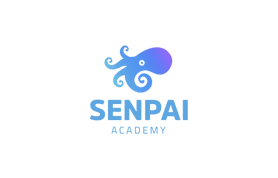

# Entrega Final | Análisis de datos | Senpai Academy

Agosto, 2022.

**Dataset:** 

https://drive.google.com/file/d/1f3rcarrVUjkZLWcNwY8t2CwRrvZlO3NE/view?usp=sharing






## Datos del Grupo 5

Nombre | Apellido
-------|----------
Gerardo  | Castro
Virginia | Paternostro






## Herramientas utilizadas

A continuación se detallan las herramientas utilizadas para el desarrollo del trabajo.

- Pandas
- Seaborn
- PyCountry
- Power BI



In [1]:
import pandas as pd
import seaborn as sns

In [2]:
!pip install pycountry

## CONSIGNA ##


En el próximo trabajo ahondaremos en confirmar o refutar tres hipótesis, generando para ello una cierta cantidad de consultas que consideraremos necesarias.

**HIPÓTESIS 1**

A partir del 2010, se ve un claro despegue en la cantidad de producciones, tanto a nivel de películas (movies) como de series (shows), coincidiendo con la aparición de las plataformas de streaming, producciones *on demand*.

**HIPÓTESIS 2**

Con la evolución de la tecnología, las producciones cinematográficas han acompañado también su evolución, por ejemplo, las películas de animación se realizan actualmente 100% animadas, utilizando programas y plataformas tecnológicas, llegando a un público muy diverso, tanto de adultos como niños. 

Sabiendo que los niños tienen una capacidad de atención menor a la de un adulto, y que los adultos tienen menos tiempo debido a la vorágine del trabajo y actividades cotidianas se puede suponer que las películas animadas duran en promedio menos tiempo que hace 15 años.

**HIPÓTESIS 3**

En los últimos 10 años la proporción de series en la industria ha crecido, es decir, hoy en día se producen, en proporción, más series que hace 10 años.


## Carga de datos

In [3]:
df_inicial = pd.read_csv('titles.csv')
df_inicial.head()

id                                title   type  \
0  ts300399  Five Came Back: The Reference Films   SHOW   
1   tm84618                          Taxi Driver  MOVIE   
2  tm154986                          Deliverance  MOVIE   
3  tm127384      Monty Python and the Holy Grail  MOVIE   
4  tm120801                      The Dirty Dozen  MOVIE   

                                         description  release_year  \
0  This collection includes 12 World War II-era p...          1945   
1  A mentally unstable Vietnam War veteran works ...          1976   
2  Intent on seeing the Cahulawassee River before...          1972   
3  King Arthur, accompanied by his squire, recrui...          1975   
4  12 American military prisoners in World War II...          1967   

  age_certification  runtime                                       genres  \
0             TV-MA       51                            ['documentation']   
1                 R      114                           ['drama', 'crime']   
2                 R      109  ['drama', 'action', 'thriller', 'european']   
3                PG       91              ['fantasy', 'action', 'comedy']   
4               NaN      150                            ['war', 'action']   

  production_countries  seasons    imdb_id  imdb_score  imdb_votes  \
0               ['US']      1.0        NaN         NaN         NaN   
1               ['US']      NaN  tt0075314         8.2    808582.0   
2               ['US']      NaN  tt0068473         7.7    107673.0   
3               ['GB']      NaN  tt0071853         8.2    534486.0   
4         ['GB', 'US']      NaN  tt0061578         7.7     72662.0   

   tmdb_popularity  tmdb_score  
0            0.600         NaN  
1           40.965       8.179  
2           10.010       7.300  
3           15.461       7.811  
4           20.398       7.600

## Carga de 5 títulos nacionales ##

In [4]:
# Hemos creado un csv con la misma estructura que el dataset original, y lo editamos para 
# introducir los datos artificialmente. 

df_nacionales = pd.read_csv('5 titulos nacionales.csv')
df_nacionales.head()

id              title   type  description  release_year  \
0   ts1000399  El año del Dragón   SHOW          NaN          2000   
1    tm204618           25 Watts  MOVIE          NaN          2005   
2   tm1354986       La Despedida  MOVIE          NaN          1999   
3   tm1347384   El baño del papa  MOVIE          NaN          2003   
4  tm12456801             Whisky  MOVIE          NaN          2001   

  age_certification  runtime     genres production_countries  seasons  \
0             TV-MA       51  ['drama']               ['UY']      1.0   
1                 R      114  ['drama']               ['UY']      NaN   
2                 R       90  ['drama']               ['UY']      NaN   
3                PG       98  ['drama']               ['UY']      NaN   
4                PG       92  ['drama']               ['UY']      NaN   

   imdb_id  imdb_score  imdb_votes  tmdb_popularity  tmdb_score  
0      NaN         6.7       35678            0.600         NaN  
1      NaN         8.2      808582           40.965       8.179  
2      NaN         7.7      107673           10.010       7.300  
3      NaN         8.2      534486           15.461       7.811  
4      NaN         7.7       72662           20.398       7.600

In [5]:
df = df_inicial.append(df_nacionales, ignore_index=True)
# Agregamos las filas creadas artificialmente al final del df_inicial, creando un nuevo dataframe.
# 'ignore_index = True' indica que se indexarán los filas agregadas con numeración correlativa
# https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.append.html
df

id                                title   type  \
0       ts300399  Five Came Back: The Reference Films   SHOW   
1        tm84618                          Taxi Driver  MOVIE   
2       tm154986                          Deliverance  MOVIE   
3       tm127384      Monty Python and the Holy Grail  MOVIE   
4       tm120801                      The Dirty Dozen  MOVIE   
...          ...                                  ...    ...   
5850   ts1000399                    El año del Dragón   SHOW   
5851    tm204618                             25 Watts  MOVIE   
5852   tm1354986                         La Despedida  MOVIE   
5853   tm1347384                     El baño del papa  MOVIE   
5854  tm12456801                               Whisky  MOVIE   

                                            description  release_year  \
0     This collection includes 12 World War II-era p...          1945   
1     A mentally unstable Vietnam War veteran works ...          1976   
2     Intent on seeing the Cahulawassee River before...          1972   
3     King Arthur, accompanied by his squire, recrui...          1975   
4     12 American military prisoners in World War II...          1967   
...                                                 ...           ...   
5850                                                NaN          2000   
5851                                                NaN          2005   
5852                                                NaN          1999   
5853                                                NaN          2003   
5854                                                NaN          2001   

     age_certification  runtime                                       genres  \
0                TV-MA       51                            ['documentation']   
1                    R      114                           ['drama', 'crime']   
2                    R      109  ['drama', 'action', 'thriller', 'european']   
3                   PG       91              ['fantasy', 'action', 'comedy']   
4                  NaN      150                            ['war', 'action']   
...                ...      ...                                          ...   
5850             TV-MA       51                                    ['drama']   
5851                 R      114                                    ['drama']   
5852                 R       90                                    ['drama']   
5853                PG       98                                    ['drama']   
5854                PG       92                                    ['drama']   

     production_countries  seasons    imdb_id  imdb_score  imdb_votes  \
0                  ['US']      1.0        NaN         NaN         NaN   
1                  ['US']      NaN  tt0075314         8.2    808582.0   
2                  ['US']      NaN  tt0068473         7.7    107673.0   
3                  ['GB']      NaN  tt0071853         8.2    534486.0   
4            ['GB', 'US']      NaN  tt0061578         7.7     72662.0   
...                   ...      ...        ...         ...         ...   
5850               ['UY']      1.0        NaN         6.7     35678.0   
5851               ['UY']      NaN        NaN         8.2    808582.0   
5852               ['UY']      NaN        NaN         7.7    107673.0   
5853               ['UY']      NaN        NaN         8.2    534486.0   
5854               ['UY']      NaN        NaN         7.7     72662.0   

      tmdb_popularity  tmdb_score  
0               0.600         NaN  
1              40.965       8.179  
2              10.010       7.300  
3              15.461       7.811  
4              20.398       7.600  
...               ...         ...  
5850            0.600         NaN  
5851           40.965       8.179  
5852           10.010       7.300  
5853           15.461       7.811  
5854           20.398       7.600  

[5855 rows x 15 columns]

## Descripción del dataset actual ##

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5855 entries, 0 to 5854
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    5855 non-null   object 
 1   title                 5854 non-null   object 
 2   type                  5855 non-null   object 
 3   description           5832 non-null   object 
 4   release_year          5855 non-null   int64  
 5   age_certification     3236 non-null   object 
 6   runtime               5855 non-null   int64  
 7   genres                5855 non-null   object 
 8   production_countries  5855 non-null   object 
 9   seasons               2107 non-null   float64
 10  imdb_id               5447 non-null   object 
 11  imdb_score            5373 non-null   float64
 12  imdb_votes            5357 non-null   float64
 13  tmdb_popularity       5764 non-null   float64
 14  tmdb_score            5543 non-null   float64
dtypes: float64(5), int64(

In [7]:
df.describe()

release_year      runtime      seasons   imdb_score    imdb_votes  \
count   5855.000000  5855.000000  2107.000000  5373.000000  5.357000e+03   
mean    2016.404441    76.899231     2.162316     6.511967  2.370854e+04   
std        6.948543    38.992186     2.688522     1.163970  9.663633e+04   
min     1945.000000     0.000000     1.000000     1.500000  5.000000e+00   
25%     2016.000000    44.000000     1.000000     5.800000  5.170000e+02   
50%     2018.000000    83.000000     1.000000     6.600000  2.242000e+03   
75%     2020.000000   104.000000     2.000000     7.300000  9.577000e+03   
max     2022.000000   240.000000    42.000000     9.600000  2.294231e+06   

       tmdb_popularity   tmdb_score  
count      5764.000000  5543.000000  
mean         22.633457     6.829819  
std          81.645925     1.170247  
min           0.009442     0.500000  
25%           2.729250     6.100000  
50%           6.823000     6.900000  
75%          16.597500     7.557000  
max        2274.044000    10.000000

A continuación queremos verificar la existencia o no de outliers según el tipo de producción en base a su duración:

In [8]:
# Un show para nosotros dura mínimo 30 minutos

df[(df.runtime < 30) &(df.type == "SHOW")].describe()

release_year     runtime     seasons  imdb_score     imdb_votes  \
count    757.000000  757.000000  757.000000  707.000000     707.000000   
mean    2016.299868   21.055482    2.671070    6.765488   10230.975955   
std        6.183154    6.863529    2.935618    1.168046   35128.595060   
min     1981.000000    0.000000    1.000000    2.000000       6.000000   
25%     2015.000000   19.000000    1.000000    6.100000     286.000000   
50%     2018.000000   23.000000    2.000000    6.800000    1078.000000   
75%     2020.000000   25.000000    3.000000    7.600000    4450.000000   
max     2022.000000   29.000000   39.000000    9.500000  325381.000000   

       tmdb_popularity  tmdb_score  
count       746.000000  710.000000  
mean         20.067568    7.543469  
std          42.292111    1.186229  
min           0.600000    0.500000  
25%           3.267250    7.000000  
50%           8.609000    7.600000  
75%          20.038250    8.296000  
max         656.832000   10.000000

In [9]:
# Una movie para nosotros dura mínimo 60 minutos

df[(df.runtime < 60) &(df.type == "MOVIE")].describe()

release_year     runtime  seasons  imdb_score    imdb_votes  \
count    351.000000  351.000000      0.0  204.000000    193.000000   
mean    2017.646724   38.128205      NaN    6.242647   1219.150259   
std        5.353822   15.829920      NaN    1.050730   2453.262841   
min     1987.000000    2.000000      NaN    2.200000      6.000000   
25%     2017.000000   24.000000      NaN    5.700000     94.000000   
50%     2019.000000   39.000000      NaN    6.400000    411.000000   
75%     2020.000000   54.000000      NaN    7.000000   1340.000000   
max     2022.000000   59.000000      NaN    8.600000  17538.000000   

       tmdb_popularity  tmdb_score  
count       345.000000  321.000000  
mean          8.740497    6.438629  
std          31.953802    1.320394  
min           0.009442    1.000000  
25%           1.737000    5.900000  
50%           2.854000    6.500000  
75%           5.399000    7.100000  
max         467.110000   10.000000

El dataset actual contiene 5.855 filas y 15 columnas.

De las 15 columnas, 8 son categóricas, siendo el resto de tipo numérico.

A golpe de vista podemos identificar rápidamente dos columnas que tienen una gran proporción de campos nulos, *age_certification* y *seasons*.

Se puede observar que en las dos columnas que contienen score (*imdb_score* y *tmdb_score*) sus valores oscilan entre 1 y 10 puntos.

Identificamos que algunos shows tienen una duración menor a 30 minutos, lo mismo sucede con las películas que tienen una duración menor a 60 minutos. En ambos casos no es válido el *runtime* para nuestro trabajo.


## Limitaciones 

Partimos de un dataset dado, desconocemos el origen del mismo. No sabemos si puede llegar a tener cierto sesgo, cuáles son las fuentes de datos ni los criterios para recopilar e incluir la información.

Por lo tanto, nuestras conclusiones estarán ligadas a este set de datos dados, y se considerarán válidos a efectos didácticos.

## Supuestos

1. Un serie (show) dura más de 30 minutos.
2. Una película (movie) dura más de 60 minutos.
3. Cuando una producción tiene más de un género, se considera al primero como el género de dicha producción.
4. Cuando una producción tiene más de un país, se considera al primero como el país de dicha producción.
5. En la columna donde se identifican los países de origen de la producción, decidimos dejar los *NaN* vacíos para que no influyan en el análisis que realizaremos.

### Visualizaciones preliminares del dataset original relacionadas con nuestras hipótesis

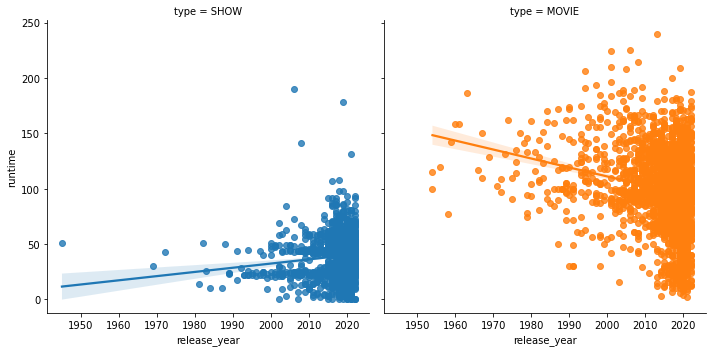

In [10]:
sns.lmplot(data=df, x="release_year", y="runtime", col="type", hue="type")

# Gráficos de dispersión desagragados por tipo de producción (SHOW, MOVIE), mostrando la 
# evolución de la duración de las producciones con el tiempo y una línea de tendencia.

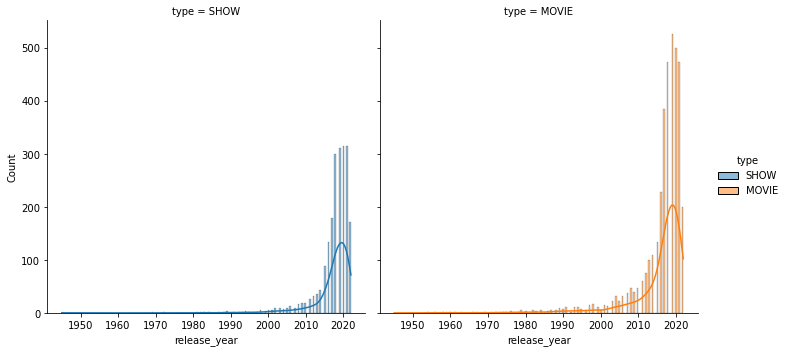

In [11]:
sns.displot(data=df, x="release_year", col="type", kde=True, hue = 'type')

# Gráfico de barras desagregado por tipo, indicando la cantidad de producciones
# por año, y una línea de tendencia suavizada por el estimador kde (kernel density estimation).

# Muestra un aumento sostenido en el tiempo hasta 2010-2012 y un punto de crecimiento 
# exponencial a partir de allí. 

# También muestra un descenso muy marcado a partir de 2020, coincidente con la pandemia 
# de COVID-19.

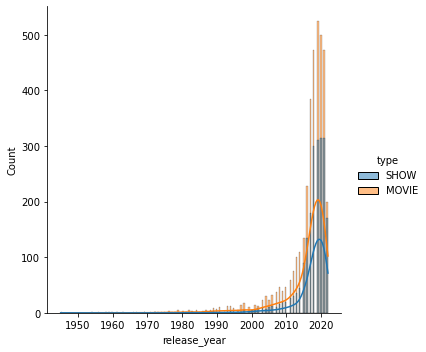

In [12]:
sns.displot(data=df, x="release_year", kde=True, hue = 'type')

# Igual que la anterior pero con los gráficos superpuestos. 

# Las gráficas parecen tener un andamiento similar, tal vez con un "despegue" de la producción
# de películas algo previo al de las series.

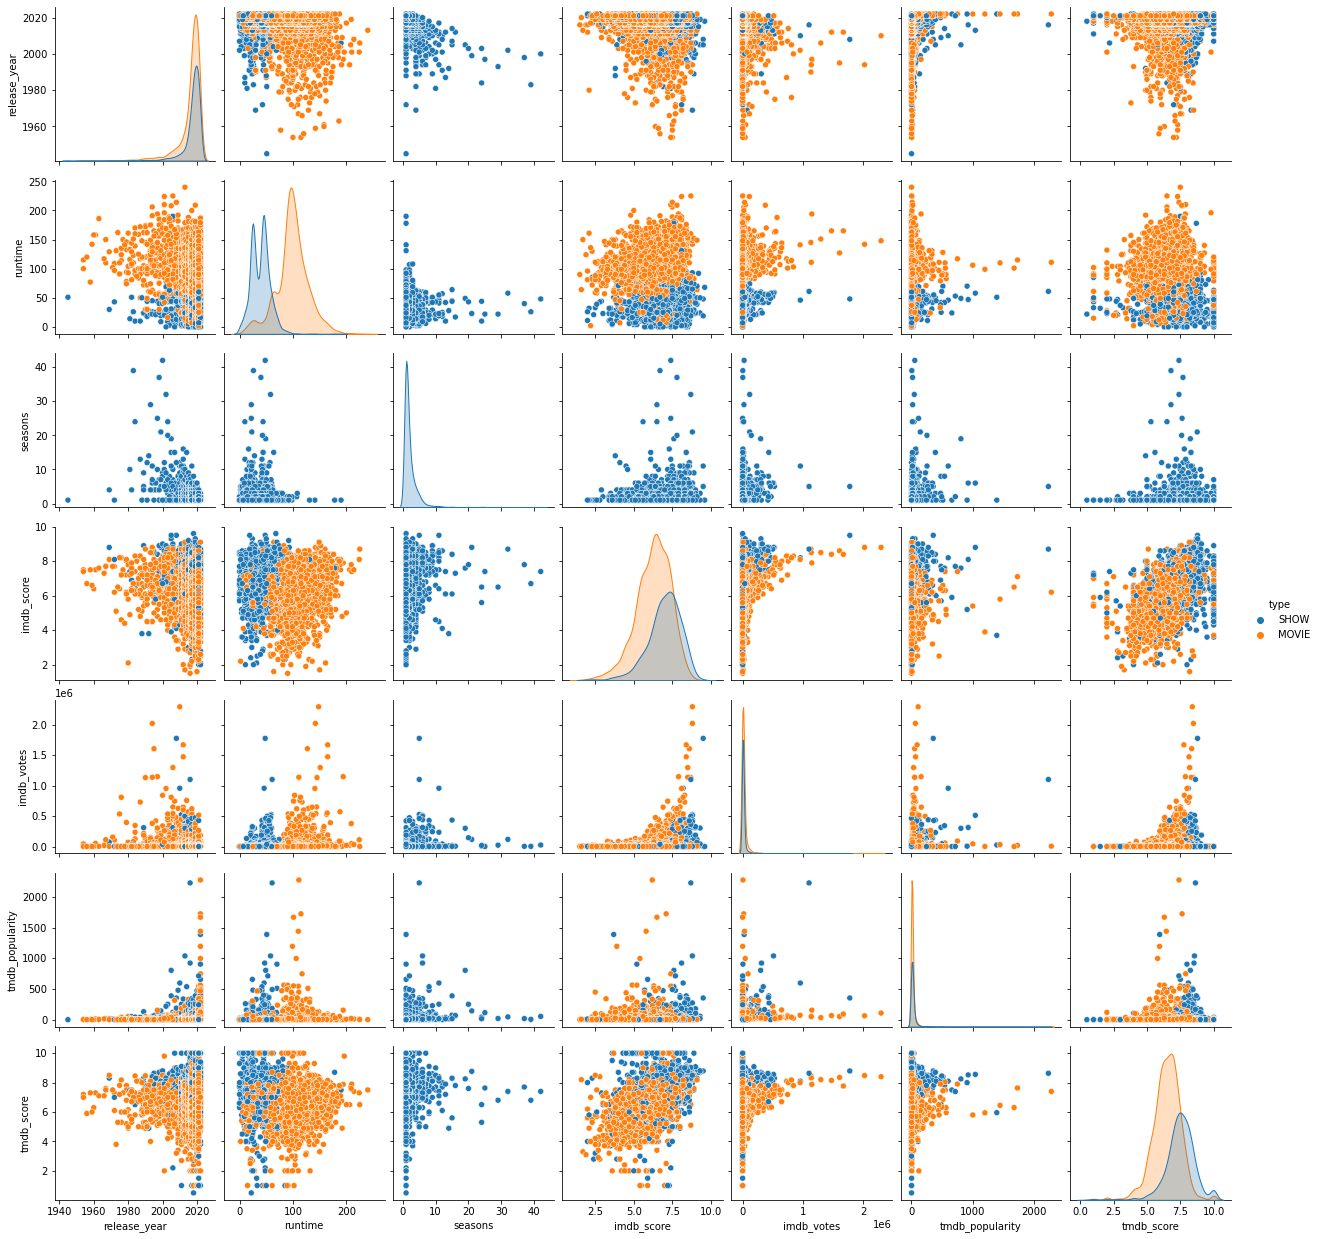

In [13]:
sns.pairplot(data=df,hue="type")

# El método pairplot de seaborn hace un cruzamiento dos a dos de todas las variables numéricas 
# del dataframe, permitiéndonos visualizar posibles correlaciones o aspectos interesantes. 

# En este caso, el parámetro 'hue' permite desagregar por tipo, cambiando el color para 
# shows y movies.

### Observaciones
- La duración de las series es en líneas generales inferior a la de las películas (lo que resulta razonable si fuera que el runtime del dataset corresponde a duración promedio de cada capítulo).

- Parece haber una cierta correlación entre los scores de tmdb e imdb.

<AxesSubplot:>

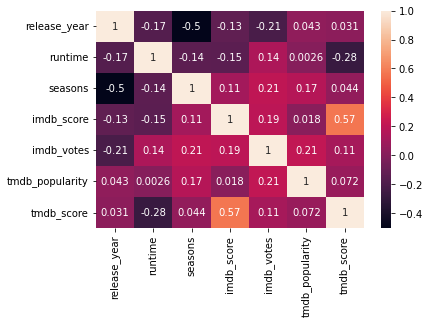

In [14]:
# Hacemos una matriz de correlación y un mapa de calor para identificar los coeficientes de 
# correlación de las variables numericas 2 a 2.

df_subset = df 
corr_df = df_subset.corr(method='pearson')
sns.heatmap(corr_df, annot=True)

## Limpieza de datos

In [15]:
# Verificamos existencia de duplicados.

df_no_duplicates = df.drop_duplicates()

In [16]:
print(df.size, df_no_duplicates.size)

87825 87825


Dada la respuesta del método *size*, podemos decir que no encontramos datos duplicados.

In [17]:
# Vamos a sustituir los NaN de la columna seasons por el valor 0, para mantener el tipo de 
# dato numérico.

values = {"seasons": 0}
df = df.fillna(value=values)
df

id                                title   type  \
0       ts300399  Five Came Back: The Reference Films   SHOW   
1        tm84618                          Taxi Driver  MOVIE   
2       tm154986                          Deliverance  MOVIE   
3       tm127384      Monty Python and the Holy Grail  MOVIE   
4       tm120801                      The Dirty Dozen  MOVIE   
...          ...                                  ...    ...   
5850   ts1000399                    El año del Dragón   SHOW   
5851    tm204618                             25 Watts  MOVIE   
5852   tm1354986                         La Despedida  MOVIE   
5853   tm1347384                     El baño del papa  MOVIE   
5854  tm12456801                               Whisky  MOVIE   

                                            description  release_year  \
0     This collection includes 12 World War II-era p...          1945   
1     A mentally unstable Vietnam War veteran works ...          1976   
2     Intent on seeing the Cahulawassee River before...          1972   
3     King Arthur, accompanied by his squire, recrui...          1975   
4     12 American military prisoners in World War II...          1967   
...                                                 ...           ...   
5850                                                NaN          2000   
5851                                                NaN          2005   
5852                                                NaN          1999   
5853                                                NaN          2003   
5854                                                NaN          2001   

     age_certification  runtime                                       genres  \
0                TV-MA       51                            ['documentation']   
1                    R      114                           ['drama', 'crime']   
2                    R      109  ['drama', 'action', 'thriller', 'european']   
3                   PG       91              ['fantasy', 'action', 'comedy']   
4                  NaN      150                            ['war', 'action']   
...                ...      ...                                          ...   
5850             TV-MA       51                                    ['drama']   
5851                 R      114                                    ['drama']   
5852                 R       90                                    ['drama']   
5853                PG       98                                    ['drama']   
5854                PG       92                                    ['drama']   

     production_countries  seasons    imdb_id  imdb_score  imdb_votes  \
0                  ['US']      1.0        NaN         NaN         NaN   
1                  ['US']      0.0  tt0075314         8.2    808582.0   
2                  ['US']      0.0  tt0068473         7.7    107673.0   
3                  ['GB']      0.0  tt0071853         8.2    534486.0   
4            ['GB', 'US']      0.0  tt0061578         7.7     72662.0   
...                   ...      ...        ...         ...         ...   
5850               ['UY']      1.0        NaN         6.7     35678.0   
5851               ['UY']      0.0        NaN         8.2    808582.0   
5852               ['UY']      0.0        NaN         7.7    107673.0   
5853               ['UY']      0.0        NaN         8.2    534486.0   
5854               ['UY']      0.0        NaN         7.7     72662.0   

      tmdb_popularity  tmdb_score  
0               0.600         NaN  
1              40.965       8.179  
2              10.010       7.300  
3              15.461       7.811  
4              20.398       7.600  
...               ...         ...  
5850            0.600         NaN  
5851           40.965       8.179  
5852           10.010       7.300  
5853           15.461       7.811  
5854           20.398       7.600  

[5855 rows x 15 columns]

In [18]:
# A continuación eliminaremos las columnas que no son pertinentes para nuestro análisis.

df = df.drop(['id', 'description', 'age_certification', 'imdb_id' ], axis=1)
df

title   type  release_year  runtime  \
0     Five Came Back: The Reference Films   SHOW          1945       51   
1                             Taxi Driver  MOVIE          1976      114   
2                             Deliverance  MOVIE          1972      109   
3         Monty Python and the Holy Grail  MOVIE          1975       91   
4                         The Dirty Dozen  MOVIE          1967      150   
...                                   ...    ...           ...      ...   
5850                    El año del Dragón   SHOW          2000       51   
5851                             25 Watts  MOVIE          2005      114   
5852                         La Despedida  MOVIE          1999       90   
5853                     El baño del papa  MOVIE          2003       98   
5854                               Whisky  MOVIE          2001       92   

                                           genres production_countries  \
0                               ['documentation']               ['US']   
1                              ['drama', 'crime']               ['US']   
2     ['drama', 'action', 'thriller', 'european']               ['US']   
3                 ['fantasy', 'action', 'comedy']               ['GB']   
4                               ['war', 'action']         ['GB', 'US']   
...                                           ...                  ...   
5850                                    ['drama']               ['UY']   
5851                                    ['drama']               ['UY']   
5852                                    ['drama']               ['UY']   
5853                                    ['drama']               ['UY']   
5854                                    ['drama']               ['UY']   

      seasons  imdb_score  imdb_votes  tmdb_popularity  tmdb_score  
0         1.0         NaN         NaN            0.600         NaN  
1         0.0         8.2    808582.0           40.965       8.179  
2         0.0         7.7    107673.0           10.010       7.300  
3         0.0         8.2    534486.0           15.461       7.811  
4         0.0         7.7     72662.0           20.398       7.600  
...       ...         ...         ...              ...         ...  
5850      1.0         6.7     35678.0            0.600         NaN  
5851      0.0         8.2    808582.0           40.965       8.179  
5852      0.0         7.7    107673.0           10.010       7.300  
5853      0.0         8.2    534486.0           15.461       7.811  
5854      0.0         7.7     72662.0           20.398       7.600  

[5855 rows x 11 columns]

In [19]:
# Vamos a sustituir aquellas series que tienen una duración inferior a 30 minutos por el promedio.

mean_show = df[df.type == "SHOW"].runtime.mean()

df.runtime[(df.runtime < 30) & (df.type == "SHOW")] = mean_show
df


C:\Users\Gerardo\AppData\Local\Temp\ipykernel_13428\1612368368.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.runtime[(df.runtime < 30) & (df.type == "SHOW")] = mean_show


title   type  release_year  runtime  \
0     Five Came Back: The Reference Films   SHOW          1945     51.0   
1                             Taxi Driver  MOVIE          1976    114.0   
2                             Deliverance  MOVIE          1972    109.0   
3         Monty Python and the Holy Grail  MOVIE          1975     91.0   
4                         The Dirty Dozen  MOVIE          1967    150.0   
...                                   ...    ...           ...      ...   
5850                    El año del Dragón   SHOW          2000     51.0   
5851                             25 Watts  MOVIE          2005    114.0   
5852                         La Despedida  MOVIE          1999     90.0   
5853                     El baño del papa  MOVIE          2003     98.0   
5854                               Whisky  MOVIE          2001     92.0   

                                           genres production_countries  \
0                               ['documentation']               ['US']   
1                              ['drama', 'crime']               ['US']   
2     ['drama', 'action', 'thriller', 'european']               ['US']   
3                 ['fantasy', 'action', 'comedy']               ['GB']   
4                               ['war', 'action']         ['GB', 'US']   
...                                           ...                  ...   
5850                                    ['drama']               ['UY']   
5851                                    ['drama']               ['UY']   
5852                                    ['drama']               ['UY']   
5853                                    ['drama']               ['UY']   
5854                                    ['drama']               ['UY']   

      seasons  imdb_score  imdb_votes  tmdb_popularity  tmdb_score  
0         1.0         NaN         NaN            0.600         NaN  
1         0.0         8.2    808582.0           40.965       8.179  
2         0.0         7.7    107673.0           10.010       7.300  
3         0.0         8.2    534486.0           15.461       7.811  
4         0.0         7.7     72662.0           20.398       7.600  
...       ...         ...         ...              ...         ...  
5850      1.0         6.7     35678.0            0.600         NaN  
5851      0.0         8.2    808582.0           40.965       8.179  
5852      0.0         7.7    107673.0           10.010       7.300  
5853      0.0         8.2    534486.0           15.461       7.811  
5854      0.0         7.7     72662.0           20.398       7.600  

[5855 rows x 11 columns]

In [20]:
# Confirmación de que no quedan campos con duración menor a 30 minutos en la columna runtime 
# filtrado por SHOW.

df[(df.runtime < 30) &(df.type == "SHOW")].describe()

release_year  runtime  seasons  imdb_score  imdb_votes  \
count           0.0      0.0      0.0         0.0         0.0   
mean            NaN      NaN      NaN         NaN         NaN   
std             NaN      NaN      NaN         NaN         NaN   
min             NaN      NaN      NaN         NaN         NaN   
25%             NaN      NaN      NaN         NaN         NaN   
50%             NaN      NaN      NaN         NaN         NaN   
75%             NaN      NaN      NaN         NaN         NaN   
max             NaN      NaN      NaN         NaN         NaN   

       tmdb_popularity  tmdb_score  
count              0.0         0.0  
mean               NaN         NaN  
std                NaN         NaN  
min                NaN         NaN  
25%                NaN         NaN  
50%                NaN         NaN  
75%                NaN         NaN  
max                NaN         NaN

In [21]:
# Vamos a sustituir aquellas películas que tienen una duración inferior a 60 minutos por el promedio.

mean_movie = df[df.type == "MOVIE"].runtime.mean()

df.runtime[(df.runtime < 60) & (df.type == "MOVIE")] = mean_movie
df

C:\Users\Gerardo\AppData\Local\Temp\ipykernel_13428\2170546354.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.runtime[(df.runtime < 60) & (df.type == "MOVIE")] = mean_movie


title   type  release_year  runtime  \
0     Five Came Back: The Reference Films   SHOW          1945     51.0   
1                             Taxi Driver  MOVIE          1976    114.0   
2                             Deliverance  MOVIE          1972    109.0   
3         Monty Python and the Holy Grail  MOVIE          1975     91.0   
4                         The Dirty Dozen  MOVIE          1967    150.0   
...                                   ...    ...           ...      ...   
5850                    El año del Dragón   SHOW          2000     51.0   
5851                             25 Watts  MOVIE          2005    114.0   
5852                         La Despedida  MOVIE          1999     90.0   
5853                     El baño del papa  MOVIE          2003     98.0   
5854                               Whisky  MOVIE          2001     92.0   

                                           genres production_countries  \
0                               ['documentation']               ['US']   
1                              ['drama', 'crime']               ['US']   
2     ['drama', 'action', 'thriller', 'european']               ['US']   
3                 ['fantasy', 'action', 'comedy']               ['GB']   
4                               ['war', 'action']         ['GB', 'US']   
...                                           ...                  ...   
5850                                    ['drama']               ['UY']   
5851                                    ['drama']               ['UY']   
5852                                    ['drama']               ['UY']   
5853                                    ['drama']               ['UY']   
5854                                    ['drama']               ['UY']   

      seasons  imdb_score  imdb_votes  tmdb_popularity  tmdb_score  
0         1.0         NaN         NaN            0.600         NaN  
1         0.0         8.2    808582.0           40.965       8.179  
2         0.0         7.7    107673.0           10.010       7.300  
3         0.0         8.2    534486.0           15.461       7.811  
4         0.0         7.7     72662.0           20.398       7.600  
...       ...         ...         ...              ...         ...  
5850      1.0         6.7     35678.0            0.600         NaN  
5851      0.0         8.2    808582.0           40.965       8.179  
5852      0.0         7.7    107673.0           10.010       7.300  
5853      0.0         8.2    534486.0           15.461       7.811  
5854      0.0         7.7     72662.0           20.398       7.600  

[5855 rows x 11 columns]

In [22]:
# Confirmación de que no quedan campos con duración menor a 60 minutos en la columna 
# runtime filtrado por MOVIE.

df[(df.runtime < 60) &(df.type == "MOVIE")].describe()

release_year  runtime  seasons  imdb_score  imdb_votes  \
count           0.0      0.0      0.0         0.0         0.0   
mean            NaN      NaN      NaN         NaN         NaN   
std             NaN      NaN      NaN         NaN         NaN   
min             NaN      NaN      NaN         NaN         NaN   
25%             NaN      NaN      NaN         NaN         NaN   
50%             NaN      NaN      NaN         NaN         NaN   
75%             NaN      NaN      NaN         NaN         NaN   
max             NaN      NaN      NaN         NaN         NaN   

       tmdb_popularity  tmdb_score  
count              0.0         0.0  
mean               NaN         NaN  
std                NaN         NaN  
min                NaN         NaN  
25%                NaN         NaN  
50%                NaN         NaN  
75%                NaN         NaN  
max                NaN         NaN

## Transformación de datos

In [23]:
df2 = df
print(type(df2['genres'][0]))
print(type(df2['production_countries'][0]))

# Los países y los géneros están guardados en el dataframe como un string, que a su
# vez contiene una lista de diferentes países / géneros. 

# Definimos algunas funciones para extraer la infomración de país y género de forma más amigable.
def country_convert (country_code:str) -> str: 
    import pycountry
    '''Converts a string containing a list of country codes in alpha_2 format to complete 
    country name of the first country in the list (Country names as per ISO 3166-2)
    '''
    result = []
    for items in eval(country_code):
        country = pycountry.countries.get (alpha_2 = items)
        if country: 
            result.append(country.name)
        else: 
            result.append("") 
    if len(result) == 0:
        return ("")  
    return result[0] 

# Esta función hace tres cosas: 
# 1. Saca las comillas, convierte el STR de una lista en lista
# 2. Convierte los códigos cortos del país en el nombre completo del país
# 3. Devuelve el primer elemento de la lista de nombres largos.

def main_genre_extractor (genre:str) -> str: 
    '''Converts a string containing a list of genres in a string corresponding to 
    first item in the list 
    '''
    result = eval(genre)  
    if len(result) == 0:
        return ("")  
    else:
        return result[0]
    
# Esta función hace dos cosas: 
# 1. Saca las comillas, convierte el STR de una lista en lista 
# 2. Devuelve el primer elemento de la lista de nombres largos.

    
df2["main_genre"] = df2['genres'].apply(main_genre_extractor)
df2['country_name'] = df2['production_countries'].apply(country_convert)
df2

<class 'str'>
<class 'str'>


title   type  release_year  runtime  \
0     Five Came Back: The Reference Films   SHOW          1945     51.0   
1                             Taxi Driver  MOVIE          1976    114.0   
2                             Deliverance  MOVIE          1972    109.0   
3         Monty Python and the Holy Grail  MOVIE          1975     91.0   
4                         The Dirty Dozen  MOVIE          1967    150.0   
...                                   ...    ...           ...      ...   
5850                    El año del Dragón   SHOW          2000     51.0   
5851                             25 Watts  MOVIE          2005    114.0   
5852                         La Despedida  MOVIE          1999     90.0   
5853                     El baño del papa  MOVIE          2003     98.0   
5854                               Whisky  MOVIE          2001     92.0   

                                           genres production_countries  \
0                               ['documentation']               ['US']   
1                              ['drama', 'crime']               ['US']   
2     ['drama', 'action', 'thriller', 'european']               ['US']   
3                 ['fantasy', 'action', 'comedy']               ['GB']   
4                               ['war', 'action']         ['GB', 'US']   
...                                           ...                  ...   
5850                                    ['drama']               ['UY']   
5851                                    ['drama']               ['UY']   
5852                                    ['drama']               ['UY']   
5853                                    ['drama']               ['UY']   
5854                                    ['drama']               ['UY']   

      seasons  imdb_score  imdb_votes  tmdb_popularity  tmdb_score  \
0         1.0         NaN         NaN            0.600         NaN   
1         0.0         8.2    808582.0           40.965       8.179   
2         0.0         7.7    107673.0           10.010       7.300   
3         0.0         8.2    534486.0           15.461       7.811   
4         0.0         7.7     72662.0           20.398       7.600   
...       ...         ...         ...              ...         ...   
5850      1.0         6.7     35678.0            0.600         NaN   
5851      0.0         8.2    808582.0           40.965       8.179   
5852      0.0         7.7    107673.0           10.010       7.300   
5853      0.0         8.2    534486.0           15.461       7.811   
5854      0.0         7.7     72662.0           20.398       7.600   

         main_genre    country_name  
0     documentation   United States  
1             drama   United States  
2             drama   United States  
3           fantasy  United Kingdom  
4               war  United Kingdom  
...             ...             ...  
5850          drama         Uruguay  
5851          drama         Uruguay  
5852          drama         Uruguay  
5853          drama         Uruguay  
5854          drama         Uruguay  

[5855 rows x 13 columns]

In [24]:
# Al haber creado nuevas columnas de género y país, vamos a eliminar las originales.

df2 = df2.drop(['genres', 'production_countries'], axis=1)
df2

title   type  release_year  runtime  \
0     Five Came Back: The Reference Films   SHOW          1945     51.0   
1                             Taxi Driver  MOVIE          1976    114.0   
2                             Deliverance  MOVIE          1972    109.0   
3         Monty Python and the Holy Grail  MOVIE          1975     91.0   
4                         The Dirty Dozen  MOVIE          1967    150.0   
...                                   ...    ...           ...      ...   
5850                    El año del Dragón   SHOW          2000     51.0   
5851                             25 Watts  MOVIE          2005    114.0   
5852                         La Despedida  MOVIE          1999     90.0   
5853                     El baño del papa  MOVIE          2003     98.0   
5854                               Whisky  MOVIE          2001     92.0   

      seasons  imdb_score  imdb_votes  tmdb_popularity  tmdb_score  \
0         1.0         NaN         NaN            0.600         NaN   
1         0.0         8.2    808582.0           40.965       8.179   
2         0.0         7.7    107673.0           10.010       7.300   
3         0.0         8.2    534486.0           15.461       7.811   
4         0.0         7.7     72662.0           20.398       7.600   
...       ...         ...         ...              ...         ...   
5850      1.0         6.7     35678.0            0.600         NaN   
5851      0.0         8.2    808582.0           40.965       8.179   
5852      0.0         7.7    107673.0           10.010       7.300   
5853      0.0         8.2    534486.0           15.461       7.811   
5854      0.0         7.7     72662.0           20.398       7.600   

         main_genre    country_name  
0     documentation   United States  
1             drama   United States  
2             drama   United States  
3           fantasy  United Kingdom  
4               war  United Kingdom  
...             ...             ...  
5850          drama         Uruguay  
5851          drama         Uruguay  
5852          drama         Uruguay  
5853          drama         Uruguay  
5854          drama         Uruguay  

[5855 rows x 11 columns]

In [25]:
# Convertimos la columna seasons, de tipo float, en int.

df2["seasons"] = df2.seasons.apply(int)
df2

title   type  release_year  runtime  \
0     Five Came Back: The Reference Films   SHOW          1945     51.0   
1                             Taxi Driver  MOVIE          1976    114.0   
2                             Deliverance  MOVIE          1972    109.0   
3         Monty Python and the Holy Grail  MOVIE          1975     91.0   
4                         The Dirty Dozen  MOVIE          1967    150.0   
...                                   ...    ...           ...      ...   
5850                    El año del Dragón   SHOW          2000     51.0   
5851                             25 Watts  MOVIE          2005    114.0   
5852                         La Despedida  MOVIE          1999     90.0   
5853                     El baño del papa  MOVIE          2003     98.0   
5854                               Whisky  MOVIE          2001     92.0   

      seasons  imdb_score  imdb_votes  tmdb_popularity  tmdb_score  \
0           1         NaN         NaN            0.600         NaN   
1           0         8.2    808582.0           40.965       8.179   
2           0         7.7    107673.0           10.010       7.300   
3           0         8.2    534486.0           15.461       7.811   
4           0         7.7     72662.0           20.398       7.600   
...       ...         ...         ...              ...         ...   
5850        1         6.7     35678.0            0.600         NaN   
5851        0         8.2    808582.0           40.965       8.179   
5852        0         7.7    107673.0           10.010       7.300   
5853        0         8.2    534486.0           15.461       7.811   
5854        0         7.7     72662.0           20.398       7.600   

         main_genre    country_name  
0     documentation   United States  
1             drama   United States  
2             drama   United States  
3           fantasy  United Kingdom  
4               war  United Kingdom  
...             ...             ...  
5850          drama         Uruguay  
5851          drama         Uruguay  
5852          drama         Uruguay  
5853          drama         Uruguay  
5854          drama         Uruguay  

[5855 rows x 11 columns]

Para analizar las hipótesis 1 y 3 debemos preparar la información agrupando por país y filtrando por tipo de producción, para ello haremos un nuevo dataframe, que llamaremos *prod_por_año*.

In [26]:
# Cantidad de shows/movies por año (¿cuántos títulos por tipo hay por año?)

shows_por_año = df2[df2.type=="SHOW"].groupby(by = 'release_year')["title"].count()
movies_por_año = df2[df2.type=="MOVIE"].groupby(by = 'release_year')["title"].count()

movies_por_año = movies_por_año.reset_index()
shows_por_año = shows_por_año.reset_index()

# Generaremos un nuevo df con la suma de los dos anteriores.

prod_por_año = pd.merge(movies_por_año,shows_por_año, on = "release_year", how = "inner").sort_values(by = "release_year")

movies_por_año
shows_por_año
prod_por_año = prod_por_año.reset_index()

prod_por_año.drop(['index'], axis=1, inplace=True)

# Renombraremos las columnas para facilitar su entendimiento.

prod_por_año.rename(columns={'title_y': 'number_shows', 'title_x': 'number_movies'}, inplace=True)

# Agregamos un columna con la suma de los totales de shows y movies por año.

prod_por_año['number_total'] = prod_por_año['number_shows'] + prod_por_año['number_movies']
prod_por_año


release_year  number_movies  number_shows  number_total
0           1969              1             1             2
1           1972              2             1             3
2           1981              2             1             3
3           1982              5             1             6
4           1983              3             1             4
5           1984              5             1             6
6           1987              5             1             6
7           1988              6             1             7
8           1989              9             3            12
9           1991             11             2            13
10          1992              2             1             3
11          1993             12             2            14
12          1994             12             4            16
13          1995              8             2            10
14          1996              5             2             7
15          1997             14             2            16
16          1998             17             5            22
17          1999             11             3            14
18          2000              6             6            12
19          2001             15             6            21
20          2002             13             9            22
21          2003             23             9            32
22          2004             31             7            38
23          2005             23            10            33
24          2006             32            13            45
25          2007             38            10            48
26          2008             47            16            63
27          2009             40            19            59
28          2010             47            19            66
29          2011             60            26            86
30          2012             76            31           107
31          2013            100            35           135
32          2014            109            44           153
33          2015            133            89           222
34          2016            228           134           362
35          2017            384           179           563
36          2018            473           300           773
37          2019            525           311           836
38          2020            500           314           814
39          2021            473           314           787
40          2022            200           171           371

In [27]:
# Crearemos dos nuevas columnas, que contendrán la división del conteo por año según tipo de 
# producción por el total de producciones, para saber su proporción en el total.

prod_por_año['prop_movies'] = (prod_por_año['number_movies'] / prod_por_año['number_total']).round(2)
prod_por_año['prop_shows'] = (prod_por_año['number_shows'] / prod_por_año['number_total'] ).round(2)
prod_por_año


release_year  number_movies  number_shows  number_total  prop_movies  \
0           1969              1             1             2         0.50   
1           1972              2             1             3         0.67   
2           1981              2             1             3         0.67   
3           1982              5             1             6         0.83   
4           1983              3             1             4         0.75   
5           1984              5             1             6         0.83   
6           1987              5             1             6         0.83   
7           1988              6             1             7         0.86   
8           1989              9             3            12         0.75   
9           1991             11             2            13         0.85   
10          1992              2             1             3         0.67   
11          1993             12             2            14         0.86   
12          1994             12             4            16         0.75   
13          1995              8             2            10         0.80   
14          1996              5             2             7         0.71   
15          1997             14             2            16         0.88   
16          1998             17             5            22         0.77   
17          1999             11             3            14         0.79   
18          2000              6             6            12         0.50   
19          2001             15             6            21         0.71   
20          2002             13             9            22         0.59   
21          2003             23             9            32         0.72   
22          2004             31             7            38         0.82   
23          2005             23            10            33         0.70   
24          2006             32            13            45         0.71   
25          2007             38            10            48         0.79   
26          2008             47            16            63         0.75   
27          2009             40            19            59         0.68   
28          2010             47            19            66         0.71   
29          2011             60            26            86         0.70   
30          2012             76            31           107         0.71   
31          2013            100            35           135         0.74   
32          2014            109            44           153         0.71   
33          2015            133            89           222         0.60   
34          2016            228           134           362         0.63   
35          2017            384           179           563         0.68   
36          2018            473           300           773         0.61   
37          2019            525           311           836         0.63   
38          2020            500           314           814         0.61   
39          2021            473           314           787         0.60   
40          2022            200           171           371         0.54   

    prop_shows  
0         0.50  
1         0.33  
2         0.33  
3         0.17  
4         0.25  
5         0.17  
6         0.17  
7         0.14  
8         0.25  
9         0.15  
10        0.33  
11        0.14  
12        0.25  
13        0.20  
14        0.29  
15        0.12  
16        0.23  
17        0.21  
18        0.50  
19        0.29  
20        0.41  
21        0.28  
22        0.18  
23        0.30  
24        0.29  
25        0.21  
26        0.25  
27        0.32  
28        0.29  
29        0.30  
30        0.29  
31        0.26  
32        0.29  
33        0.40  
34        0.37  
35        0.32  
36        0.39  
37        0.37  
38        0.39  
39        0.40  
40        0.46

## Descripción de los dataframes utilizados para el análisis ##

Los dataframes que creamos y utilizamos para poder analizar son el *df2* y *prod_por_año*. 
Vale aclarar que el dataframe original es el *df* que fue descripto al comienzo de este trabajo.

El *df2* es el dataframe original al que le efectuamos la limpieza y trasnformación de los datos, resultando un dataframe limpio y con la información pertinente para nuestro trabajo.

El dataframe *prod_por_año* es el resultado de aplicar ciertos filtros que nos han sido de utilidad para analizar las hipótesis 1 y 3 de una manera más simple.


## Análisis y Visualizaciones




### HIPÓTESIS 1

A partir del 2010, se ve un claro despegue en la cantidad de producciones, tanto a nivel de películas (movies) como de series (shows), coincidiendo con la aparición de las plataformas de streaming, producciones *on demand*.


[Text(0.5, 1.0, 'Total de producciones a lo largo del tiempo')]

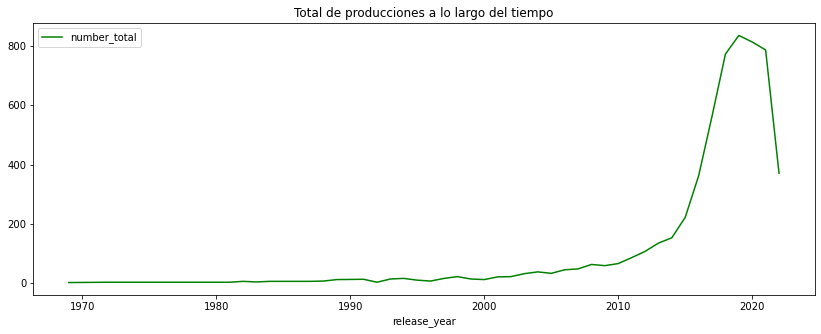

In [28]:
prod_por_año.plot(kind='line', x = 'release_year', y = 'number_total', figsize = (14,5), color = 'green').set(title = 'Total de producciones a lo largo del tiempo')

[Text(0.5, 1.0, 'Total de producciones a lo largo del tiempo')]

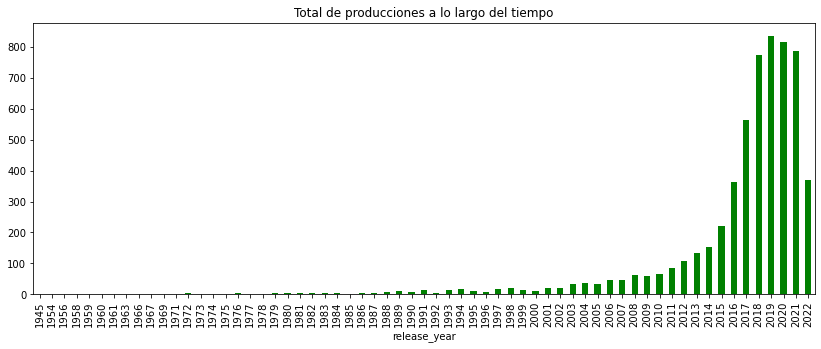

In [29]:
df_conteo_por_año = df2.groupby(by = 'release_year')["title"].count()
df_conteo_por_año.plot(kind='bar', figsize = (14,5), color = 'green').set(title = 'Total de producciones a lo largo del tiempo')

In [30]:
df_conteo_por_año

release_year
1945      1
1954      2
1956      1
1958      1
1959      1
       ... 
2018    773
2019    836
2020    814
2021    787
2022    371
Name: title, Length: 63, dtype: int64

[Text(0.5, 1.0, 'Total de producciones a lo largo de los últimos 12 años')]

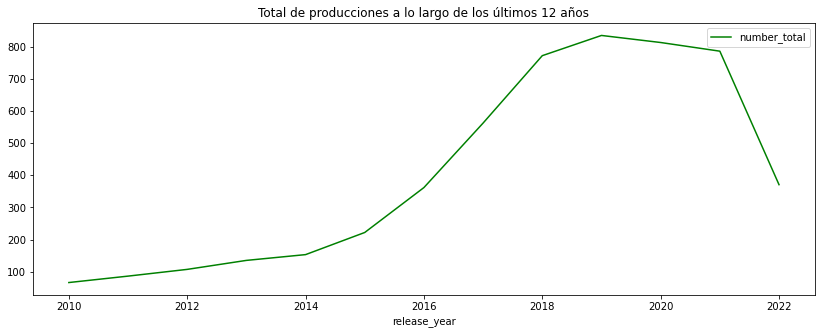

In [31]:
# Hacemos un filtrado por año para hacer un 'zoom' de los últimos 10 años, para ver qué
# sucede más en detalle.

prod_por_año[prod_por_año.release_year > 2009].plot(kind='line', x = 'release_year', y = 'number_total', figsize = (14,5), color = 'green').set(title = 'Total de producciones a lo largo de los últimos 12 años')

[Text(0.5, 1.0, 'Total de producciones a lo largo de los últimos 12 años')]

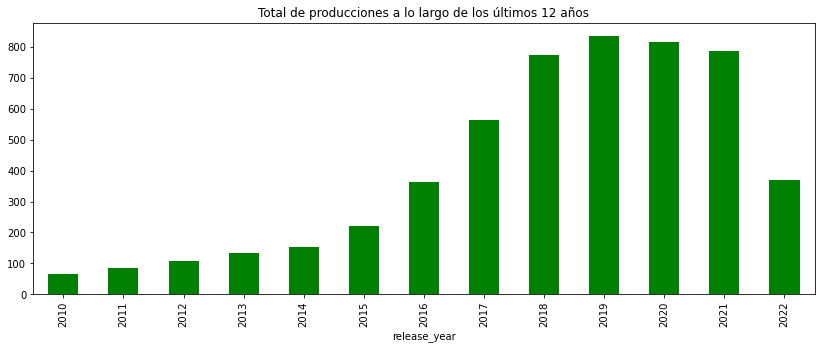

In [32]:
df_conteo_por_año = df2.groupby(by = 'release_year')["title"].count()
df_conteo_por_año[df_conteo_por_año.index > 2009].plot(kind='bar', figsize = (14,5),color = 'green').set(title = 'Total de producciones a lo largo de los últimos 12 años')

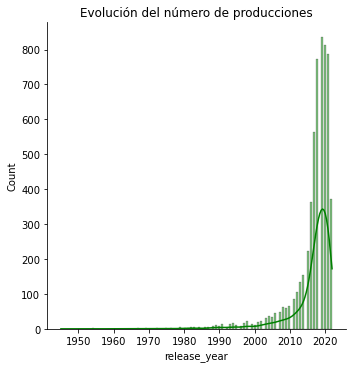

In [33]:
sns.displot(data=df2, x="release_year", kde=True, color = 'green').set(title = 'Evolución del número de producciones')

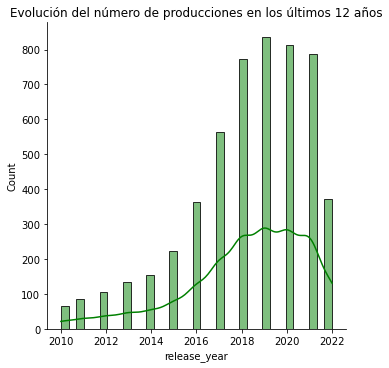

In [34]:
sns.displot(data=df2[df2.release_year > 2009], x="release_year", kde=True, color = 'green').set(title = 'Evolución del número de producciones en los últimos 12 años')

## HIPÓTESIS 2

Con la evolución de la tecnología, las producciones cinematográficas han acompañado también su evolución, por ejemplo, las películas de animación se realizan 100% animadas utilizando programas y plataformas tecnológicas, llegando a un público muy diverso, tanto adultos como niños.

Sabiendo que los niños tienen una capacidad de atención menor a la de un adulto, y que los adultos tienen menos tiempo debido a la vorágine del trabajo y actividades cotidianas se puede suponer que las películas animadas duran en promedio menos tiempo que hace 15 años.

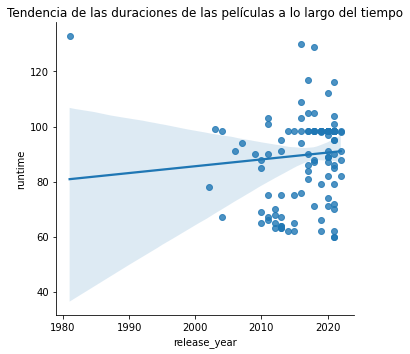

In [35]:
sns.lmplot(data=df[(df.main_genre == 'animation') & (df.type == 'MOVIE')], x="release_year", y="runtime", col="type", hue="type").set(title = 'Tendencia de las duraciones de las películas a lo largo del tiempo')

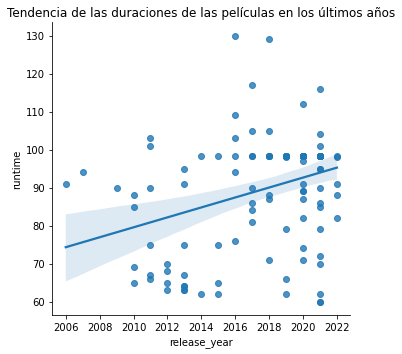

In [36]:
# Hacemos un filtrado por año para hacer un 'zoom' de los últimos 15 años, para ver 
# qué sucede más en detalle.

sns.lmplot(data=df[(df.main_genre == 'animation') & (df.type == 'MOVIE') & (df.release_year > 2005)], x="release_year", y="runtime", col="type", hue="type").set(title = 'Tendencia de las duraciones de las películas en los últimos años')

[Text(0.5, 1.0, 'Duración media anual de las películas de animación')]

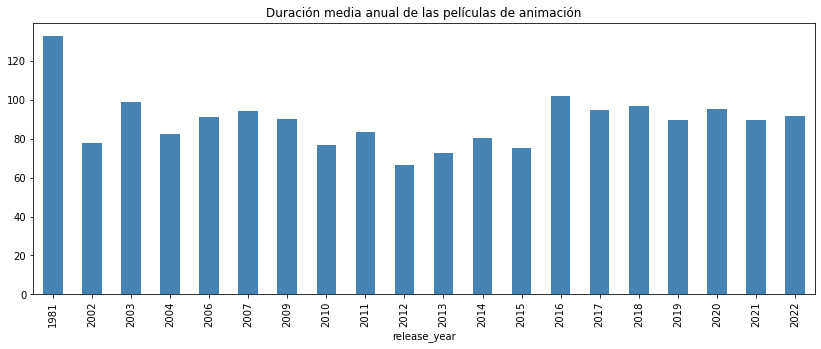

In [37]:
# Vamos a calcular la media por año con los filtros 'type = movie ' & 'main_genre = animation'

df_media_año_animation = df2[(df2.main_genre == 'animation') & (df.type == 'MOVIE')].groupby(by = 'release_year')["runtime"].mean()
df_media_año_animation.plot(kind='bar', figsize = (14,5), color = 'steelblue').set(title = 'Duración media anual de las películas de animación')

Aprovechamos la instancia para ver que sucede a nivel general con la insdutria del entretenimiento.

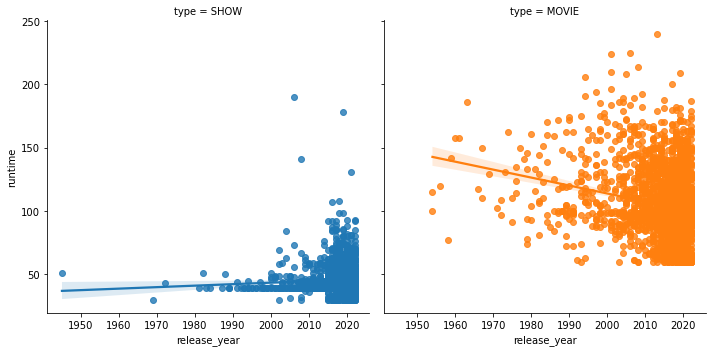

In [38]:
sns.lmplot(data=df, x="release_year", y="runtime", col="type", hue="type")

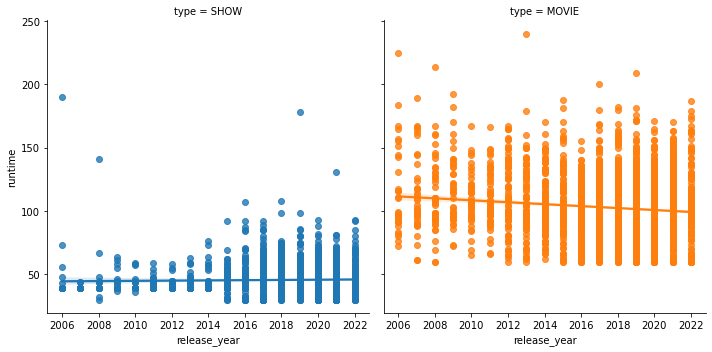

In [39]:
# Hacemos un filtrado por año para hacer un 'zoom' de los últimos 15 años, 
# para ver qué sucede más en detalle.

sns.lmplot(data=df[(df.release_year > 2005)], x="release_year", y="runtime", col="type", hue="type")

## HIPÓTESIS 3

En los últimos 10 años la proporción de series en la industria ha crecido, es decir, hoy en día se producen, en proporción, más series que hace 10 años.

[Text(0.5, 1.0, 'Proporción de series a lo largo del tiempo')]

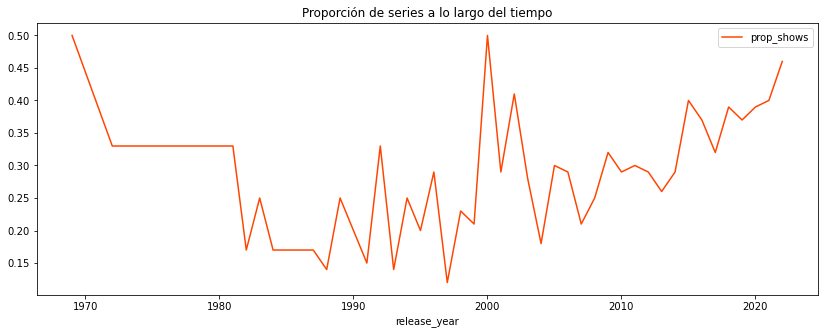

In [40]:
prod_por_año.plot(kind='line', x = 'release_year', y = 'prop_shows', figsize = (14,5), color = 'orangered').set(title = 'Proporción de series a lo largo del tiempo')

[Text(0.5, 1.0, 'Proporción de series en los últimos 12 años')]

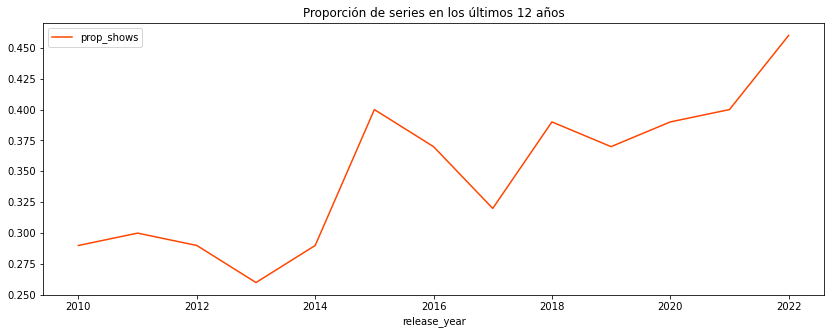

In [41]:
# Hacemos un filtrado por año para hacer un 'zoom' de los últimos 10 años, 
# para ver qué sucede más en detalle.

prod_por_año[prod_por_año.release_year > 2009].plot(kind='line', x = 'release_year', y = 'prop_shows', figsize = (14,5), color = 'orangered').set(title = 'Proporción de series en los últimos 12 años')

[Text(0.5, 1.0, 'Proporción de series y películas a lo largo del tiempo')]

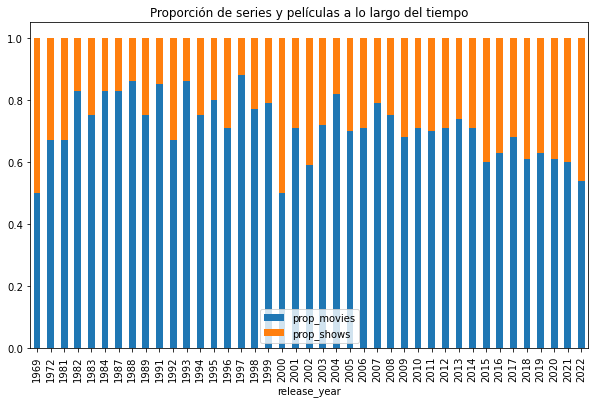

In [42]:
prod_por_año.iloc[:,[0,4,5]].plot(kind = "bar", x = "release_year", stacked = True, figsize = (10,6)).set(title = 'Proporción de series y películas a lo largo del tiempo')

[Text(0.5, 1.0, 'Proporción de series y películas en los últimos 12 años')]

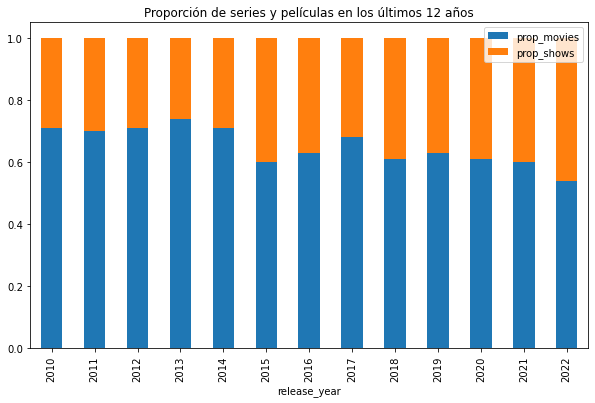

In [43]:
# Hacemos un filtrado por año para hacer un 'zoom' de los últimos 10 años, para ver 
# qué sucede más en detalle.

prod_por_año[prod_por_año.release_year > 2009].iloc[:,[0,4,5]].plot(kind = "bar", x = "release_year", stacked = True, figsize = (10,6)).set(title = 'Proporción de series y películas en los últimos 12 años')

## Conclusiones

## Hipótesis 1

Respecto a la **hipótesis 1**, podemos observar que a partir del 2010, se ve un claro despegue en la cantidad de producciones, tanto a nivel de películas (movies), como de series (shows).

Las plataformas de streaming si bien surgieron en la década del 2000, su despegue a nivel mundial se centra entre los años 2012-2015.

En base a lo anterior, observamos que existe una correlación entre los dos sucesos: aparición de plataformas y crecimiento en la cantidad de producciones, lo que nos hace pensar en la posibilidad de que una dependa de la otra. 

Demostrar esto excede a nuestros objetivos en este trabajo. 



## Hipótesis 2

En cuanto a la **hipótesis 2**, vemos que ocurre lo opuesto a lo planteado. Las películas animadas con el paso de los años han incrementado su duración. Sin embargo, si miramos a la industria en general, las películas si han decrecido en su duración, manteniéndose en caso de las series.

## Hipótesis 3

La **hipótesis 3** podemos darla como cierta, en los últimos 10 años la proporción de series en  crecido.

## Fuentes

- https://drive.google.com/file/d/1fHZUsI2IABfz-vuKMxXPs8KLMiiRDdX1/view?usp=sharing
- https://idus.us.es/bitstream/handle/11441/87550/Estudio_de_las_plataformas_de_streaming.pdf?sequence=1&isAllowed=y

## Almacenamiento de resultados

In [44]:
# Guardaremos dos set de datos que utilizamos para el análisis en dos archivos en formato feather.

df2.to_feather('dataset_original_limpio.feather') 

prod_por_año.to_feather('dataset_filtrado_por_año.feather') 